<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
2. Jelaskan beberapa cara imputing missing value!
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:

---

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocessing titanic csv

In [2]:
# Pclass
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [3]:
# Sex
df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [4]:
# Family size
for row in df:
    df['fam_size'] = df['SibSp'] + df['Parch'] + 1
df[['fam_size','Survived']].groupby(['fam_size'],as_index=False).mean()

,fam_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [5]:
# isalone
for row in df:
    df['isalone'] = 0
    df.loc[df['fam_size']==1, 'isalone']=1
df[['isalone','Survived']].groupby(['isalone'],as_index=False).mean()

,isalone,Survived
0,0,0.505650
1,1,0.303538


In [6]:
# embarked
for row in df:
    mode = df['Embarked'].mode()
    df['Embarked'] = df['Embarked'].fillna(mode)
    
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [7]:
# fare
df['CategoricalFare']=pd.qcut(df['Fare'], 4)
df[['CategoricalFare','Survived']].groupby(['CategoricalFare'],as_index=False).mean()

,CategoricalFare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [8]:
# replace sex
age_dict ={
    'male': 1,
    'female':0
}
df['Sex'] = df['Sex'].replace(age_dict)

In [9]:
# replace nan in age
df['Age'].fillna(df['Age'].median(), inplace = True)

# Age
df['CategoricalAge'] = pd.cut(df['Age'].astype(int), 3)
df[['CategoricalAge','Survived']].groupby(['CategoricalAge'],as_index=False).mean()

,CategoricalAge,Survived
0,"(-0.08, 26.667]",0.407524
1,"(26.667, 53.333]",0.375479
2,"(53.333, 80.0]",0.320000


In [10]:
# Name
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0] # membuat kolom title


title_names = df['Title'].value_counts() < 10 
df['Title'] = df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Misc,0.444444
2,Miss,0.697802
3,Mr,0.156673
4,Mrs,0.792000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    int64   
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Cabin            204 non-null    object  
 11  Embarked         891 non-null    object  
 12  fam_size         891 non-null    int64   
 13  isalone          891 non-null    int64   
 14  CategoricalFare  891 non-null    category
 15  CategoricalAge   891 non-null    category
 16  Title            891 non-null    object  
dt

In [12]:
data_x = df.drop(['PassengerId','SibSp','Ticket','Cabin','Fare','fam_size','Age','Name'], axis=1)

In [13]:
title_dict ={
    'Master': 0,
    'Misc': 1,
    'Miss': 2,
    'Mr' : 3,
    'Mrs' : 4
}
data_x['Title'] = data_x['Title'].replace(title_dict)

In [14]:
data_x

,Survived,Pclass,Sex,Parch,Embarked,isalone,CategoricalFare,CategoricalAge,Title
0,0,3,1,0,S,0,"(-0.001, 7.91]","(-0.08, 26.667]",3
1,1,1,0,0,C,0,"(31.0, 512.329]","(26.667, 53.333]",4
2,1,3,0,0,S,1,"(7.91, 14.454]","(-0.08, 26.667]",2
3,1,1,0,0,S,0,"(31.0, 512.329]","(26.667, 53.333]",4
4,0,3,1,0,S,1,"(7.91, 14.454]","(26.667, 53.333]",3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,S,1,"(7.91, 14.454]","(26.667, 53.333]",1
887,1,1,0,0,S,1,"(14.454, 31.0]","(-0.08, 26.667]",2
888,0,3,0,2,S,0,"(14.454, 31.0]","(26.667, 53.333]",2
889,1,1,1,0,C,1,"(14.454, 31.0]","(-0.08, 26.667]",3


In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()

data_x['Embarked_Code'] = label.fit_transform(data_x['Embarked']) 
data_x['Title_Code'] = label.fit_transform(data_x['Title'])
data_x['Age_Code'] = label.fit_transform(data_x['CategoricalAge'])
data_x['CategoricalFare_Code'] = label.fit_transform(data_x['CategoricalFare'])

In [16]:
drop_columns = ['CategoricalFare','CategoricalAge','Title','Embarked']
data_x.drop(drop_columns, axis=1, inplace = True)

In [17]:
data_x

,Survived,Pclass,Sex,Parch,isalone,Embarked_Code,Title_Code,Age_Code,CategoricalFare_Code
0,0,3,1,0,0,2,3,0,0
1,1,1,0,0,0,0,4,1,3
2,1,3,0,0,1,2,2,0,1
3,1,1,0,0,0,2,4,1,3
4,0,3,1,0,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,2,1,1,1
887,1,1,0,0,1,2,2,0,2
888,0,3,0,2,0,2,2,1,2
889,1,1,1,0,1,0,3,0,2


# Preprocessing titanic test csv

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df_test = pd.read_csv('titanic_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
# replace sex
age_dict ={
    'male': 1,
    'female':0
}
df_test['Sex'] = df_test['Sex'].replace(age_dict)

In [20]:
# Family size
for row in df_test:
    df_test['fam_size'] = df_test['SibSp'] + df_test['Parch'] + 1

In [21]:
# isalone
for row in df_test:
    df_test['isalone'] = 0
    df_test.loc[df['fam_size']==1, 'isalone']=1


In [22]:
# embarked
for row in df_test:
    mode = df_test['Embarked'].mode()
    df_test['Embarked'] = df_test['Embarked'].fillna(mode)
    
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace = True)

In [23]:
# replace nan in fare
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

# fare
df_test['CategoricalFare']=pd.qcut(df_test['Fare'], 4)

In [24]:
# replace nan in age
df_test['Age'].fillna(df_test['Age'].median(), inplace = True)

# Age
df_test['CategoricalAge'] = pd.cut(df_test['Age'].astype(int), 3)

In [25]:
# Name
df_test['Title'] = df_test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0] # membuat kolom title


title_names = df_test['Title'].value_counts() < 10 
df_test['Title'] = df_test['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [26]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fam_size,isalone,CategoricalFare,CategoricalAge,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,1,0,"(-0.001, 7.896]","(25.333, 50.667]",Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,2,0,"(-0.001, 7.896]","(25.333, 50.667]",Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,1,1,"(7.896, 14.454]","(50.667, 76.0]",Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,1,0,"(7.896, 14.454]","(25.333, 50.667]",Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,3,1,"(7.896, 14.454]","(-0.076, 25.333]",Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,A.5. 3236,8.0500,NaN,S,1,1,"(7.896, 14.454]","(25.333, 50.667]",Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,1,1,"(31.472, 512.329]","(25.333, 50.667]",Misc
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1,"(-0.001, 7.896]","(25.333, 50.667]",Mr
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,359309,8.0500,NaN,S,1,0,"(7.896, 14.454]","(25.333, 50.667]",Mr


In [27]:
datax_test = df_test.drop(['PassengerId','SibSp','Ticket','Cabin','Fare','fam_size','Age','Name'], axis=1)

In [28]:
title_dict ={
    'Master': 0,
    'Misc': 1,
    'Miss': 2,
    'Mr' : 3,
    'Mrs' : 4
}
datax_test['Title'] = datax_test['Title'].replace(title_dict)

In [29]:
datax_test.head()

,Pclass,Sex,Parch,Embarked,isalone,CategoricalFare,CategoricalAge,Title
0,3,1,0,Q,0,"(-0.001, 7.896]","(25.333, 50.667]",3
1,3,0,0,S,0,"(-0.001, 7.896]","(25.333, 50.667]",4
2,2,1,0,Q,1,"(7.896, 14.454]","(50.667, 76.0]",3
3,3,1,0,S,0,"(7.896, 14.454]","(25.333, 50.667]",3
4,3,0,1,S,1,"(7.896, 14.454]","(-0.076, 25.333]",4


In [30]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label = LabelEncoder()

datax_test['Embarked_Code'] = label.fit_transform(datax_test['Embarked']) 
datax_test['Age_Code'] = label.fit_transform(datax_test['CategoricalAge'])
datax_test['CategoricalFare_Code'] = label.fit_transform(datax_test['CategoricalFare'])

In [31]:
datax_test.tail()

,Pclass,Sex,Parch,Embarked,isalone,CategoricalFare,CategoricalAge,Title,Embarked_Code,Age_Code,CategoricalFare_Code
413,3,1,0,S,1,"(7.896, 14.454]","(25.333, 50.667]",3,2,1,1
414,1,0,0,C,1,"(31.472, 512.329]","(25.333, 50.667]",1,0,1,3
415,3,1,0,S,1,"(-0.001, 7.896]","(25.333, 50.667]",3,2,1,0
416,3,1,0,S,0,"(7.896, 14.454]","(25.333, 50.667]",3,2,1,1
417,3,1,1,C,0,"(14.454, 31.472]","(25.333, 50.667]",0,0,1,2


In [32]:
drop_columns = ['CategoricalFare','CategoricalAge','Embarked']
datax_test.drop(drop_columns, axis=1, inplace = True)

In [33]:
datax_test.head()

,Pclass,Sex,Parch,isalone,Title,Embarked_Code,Age_Code,CategoricalFare_Code
0,3,1,0,0,3,1,1,0
1,3,0,0,0,4,2,1,0
2,2,1,0,1,3,1,2,1
3,3,1,0,0,3,2,1,1
4,3,0,1,1,4,2,0,1


# Visualisasi

<AxesSubplot:ylabel='Survived'>

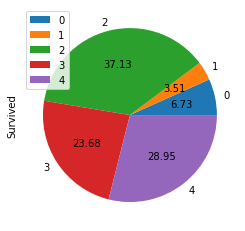

In [34]:
#code here
import numpy as np
import matplotlib.pyplot as plt

data_x.groupby('Title_Code').sum().plot(x='Title_Code', y='Survived', kind='pie', autopct='%.2f')



# Modelling

In [35]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

# Processing data
x_train = data_x.drop('Survived', axis=1)
y_train = data_x['Survived']

x_test = datax_test

In [36]:
x_train

,Pclass,Sex,Parch,isalone,Embarked_Code,Title_Code,Age_Code,CategoricalFare_Code
0,3,1,0,0,2,3,0,0
1,1,0,0,0,0,4,1,3
2,3,0,0,1,2,2,0,1
3,1,0,0,0,2,4,1,3
4,3,1,0,1,2,3,1,1
...,...,...,...,...,...,...,...,...
886,2,1,0,1,2,1,1,1
887,1,0,0,1,2,2,0,2
888,3,0,2,0,2,2,1,2
889,1,1,0,1,0,3,0,2


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# membuat model
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1, 50), 'weights' : ['uniform', 'distance']}
gscv = GridSearchCV(knn, param_grid=param_grid, scoring = 'roc_auc', cv=5)

# training data
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [38]:
# hyperparameter terbaik untuk kombinasi
gscv.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [39]:
# score validasi terbaik
gscv.best_score_

0.854183350788914

In [40]:
# Prediksi probabilitas
probabilitas = gscv.predict_proba(x_test)

In [41]:
# nilai probabilitas survived
probabilitas[:, 1]


array([0.33333333, 0.46666667, 0.46666667, 0.13333333, 0.46666667,
       0.26666667, 0.66666667, 0.33333333, 0.66666667, 0.        ,
       0.13333333, 0.66666667, 1.        , 0.2       , 0.86666667,
       0.66666667, 0.46666667, 0.6       , 0.4       , 0.4       ,
       0.6       , 0.26666667, 0.86666667, 0.93333333, 0.66666667,
       0.06666667, 0.93333333, 0.6       , 0.66666667, 0.53333333,
       0.53333333, 0.13333333, 0.13333333, 0.13333333, 0.66666667,
       0.6       , 0.4       , 0.53333333, 0.26666667, 0.26666667,
       0.73333333, 0.33333333, 0.        , 0.8       , 0.86666667,
       0.26666667, 0.6       , 0.33333333, 0.66666667, 0.2       ,
       0.4       , 0.46666667, 0.8       , 0.86666667, 0.53333333,
       0.53333333, 0.        , 0.4       , 0.06666667, 0.73333333,
       0.4       , 0.46666667, 0.33333333, 0.53333333, 0.93333333,
       0.53333333, 0.66666667, 0.4       , 0.6       , 0.53333333,
       0.66666667, 0.33333333, 0.4       , 0.6       , 0.73333

In [44]:
# score rata2 dari model dengan teknik cross-validation
score = cross_val_score(gscv,x_train,y_train)
score.mean()

0.8468292470920993

In [45]:
# Prediksi data test
y_pred = gscv.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [46]:
# nilai score roc_auc untuk data test
roc_auc_score(y_pred, gscv.predict(x_test))

1.0

In [47]:
data = {'PassengerId': np.arange(892,1310),
        'Survived' : y_pred
    
}

df = pd.DataFrame(data)

In [ ]:
df.tail()

In [ ]:
df.to_csv('survived.csv',index=False)